In [138]:
# dependencies
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# load, read, and convert to DF
file_path = 'C:/Users/ciinc/OneDrive/Documents/project4_plana.xlsx'
xl = pd.ExcelFile(file_path)

department_of_labor_df = xl.parse('Department of Labor')

department_of_commerce_df = xl.parse('Department of Commerce')

In [149]:
# drop blanks
cleaned_labor_df = department_of_labor_df.dropna(axis=0, how='any').copy()
print(cleaned_labor_df)

          RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ...  DRNO  \
1     137377000000     DL  2.0  2.0  5.0  4.0  4.0  2.0  5.0  2  ...     B   
3     193260000000     DL  4.0  1.0  2.0  4.0  2.0  2.0  4.0  2  ...     B   
4     197278000000     DL  3.0  4.0  3.0  4.0  3.0  3.0  3.0  3  ...     B   
5     156457000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4  ...     B   
8     169721000000     DL  4.0  3.0  4.0  4.0  4.0  4.0  4.0  5  ...     B   
...            ...    ...  ...  ...  ...  ...  ...  ...  ... ..  ...   ...   
7544  192141000000     DL  4.0  4.0  5.0  5.0  5.0  4.0  5.0  4  ...     C   
7545  105014000000     DL  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...     A   
7546  189629000000     DL  4.0  4.0  3.0  4.0  4.0  2.0  3.0  2  ...     C   
7547  125973000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  X  ...     C   
7549  177361000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  1  ...     A   

      DHISP  DDIS DAGEGRP  DSUPER  DFEDTEN  DSEX  DMIL  DLEAVIN

In [157]:
# drop non-numerical characters (X and Y)
cleaned_labor_df = cleaned_labor_df.applymap(str)
contains_XY_rows = cleaned_labor_df.apply(lambda row: row.str.contains(r'[XY]', case=False)).any(axis=1)
cleaned2_labor_df = cleaned_labor_df[~contains_XY_rows].copy()
print(cleaned2_labor_df)

          RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ... DRNO  \
5     156457000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4  ...    B   
8     169721000000     DL  4.0  3.0  4.0  4.0  4.0  4.0  4.0  5  ...    B   
10    191772000000     DL  3.0  3.0  4.0  4.0  2.0  3.0  3.0  2  ...    B   
11    176719000000     DL  1.0  1.0  1.0  1.0  1.0  1.0  3.0  4  ...    B   
23    167609000000     DL  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...    B   
...            ...    ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...   
7536  183012000000     DL  3.0  5.0  5.0  5.0  5.0  4.0  5.0  5  ...    C   
7541  174587000000     DL  4.0  4.0  3.0  5.0  5.0  5.0  5.0  3  ...    B   
7545  105014000000     DL  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...    A   
7546  189629000000     DL  4.0  4.0  3.0  4.0  4.0  2.0  3.0  2  ...    C   
7549  177361000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  1  ...    A   

     DHISP DDIS DAGEGRP DSUPER DFEDTEN DSEX DMIL DLEAVING       POSTWT  
5 

In [233]:
columns_to_keep = ['Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q46', 'Q48', 'Q49', 'Q50','Q52']

# Columns to remove
columns_to_remove = ['POSTWT', 'RandomID', 'agency', 'DRNO', 'DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL', 'DLEAVING'] + [col for col in cleaned2_labor_df.columns if col.startswith('Q') and col not in columns_to_keep]

# Drop the unwanted columns
cleaned2_labor_df = cleaned2_labor_df.drop(columns=columns_to_remove)
cleaned2_labor_df

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89,Recodes_Done
5,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4,4,4,4,4.0,4.0,4.0,4.0,4.0,0
8,3.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,2,5,5,5,4.0,4.0,3.0,4.0,4.0,0
10,3.0,4.0,4.0,3.0,3.0,5,5.0,5.0,5.0,5.0,...,3,5,5,3,4.0,5.0,3.0,5.0,5.0,0
11,1.0,1.0,1.0,1.0,3.0,3,4.0,5.0,4.0,4.0,...,1,3,4,1,2.0,2.0,3.0,4.0,5.0,0
23,5.0,5.0,5.0,5.0,5.0,4,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,5.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,4.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,0
7541,4.0,3.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,4,5,5,2,3.0,3.0,2.0,4.0,4.0,0
7545,5.0,5.0,5.0,5.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,0
7546,4.0,3.0,4.0,2.0,3.0,4,4.0,4.0,3.0,2.0,...,1,3,3,2,2.0,3.0,1.0,4.0,5.0,0


In [234]:
labordept_cleaned_df = cleaned2_labor_df

In [236]:
labordept_cleaned_df.head(20)

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89,Recodes_Done
5,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4,4,4,4,4.0,4.0,4.0,4.0,4.0,0
8,3.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,2,5,5,5,4.0,4.0,3.0,4.0,4.0,0
10,3.0,4.0,4.0,3.0,3.0,5,5.0,5.0,5.0,5.0,...,3,5,5,3,4.0,5.0,3.0,5.0,5.0,0
11,1.0,1.0,1.0,1.0,3.0,3,4.0,5.0,4.0,4.0,...,1,3,4,1,2.0,2.0,3.0,4.0,5.0,0
23,5.0,5.0,5.0,5.0,5.0,4,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,0
29,5.0,5.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,0
34,3.0,3.0,1.0,3.0,4.0,3,3.0,3.0,3.0,3.0,...,3,3,3,3,3.0,3.0,3.0,3.0,3.0,0
38,4.0,1.0,4.0,3.0,4.0,4,4.0,4.0,4.0,5.0,...,3,1,3,3,1.0,2.0,3.0,4.0,5.0,0
43,4.0,5.0,5.0,4.0,5.0,4,4.0,5.0,5.0,5.0,...,3,3,4,3,4.0,4.0,4.0,5.0,5.0,0
52,2.0,4.0,5.0,4.0,5.0,5,5.0,5.0,5.0,5.0,...,5,4,4,4,4.0,4.0,4.0,5.0,4.0,0


In [237]:
# Create a Recode column to store the dummy variable (initially set as 0)
labordept_cleaned_df['Recodes_Done'] = 0

# Check if any value in a row has changed from its original state (indicating recodes)
for index, row in labordept_cleaned_df.iterrows():
    original_row = row[:-1]
    if not original_row.equals(row[:-1]):
        labordept_cleaned_df.loc[index, 'Recodes_Done'] = 1

In [238]:
# reassign labordept_cleaned_df
recoded_labor_df = labordept_cleaned_df.copy()

# Replace values based on conditions
recoded_labor_df.replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes', 4: 'Yes', 5: 'Yes'}, inplace=True)

In [239]:
recoded_labor_df.head()

,Q2,Q3,Q4,Q6,Q7,Q46,Q48,Q49,Q50,Q52,...,Q60,Q71,Q72,Q84,Q85,Q86,Q87,Q88,Q89,Recodes_Done
5,4.0,4.0,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,...,4,4,4,4,4.0,4.0,4.0,4.0,4.0,No
8,3.0,4.0,4.0,4.0,4.0,5,5.0,5.0,5.0,5.0,...,2,5,5,5,4.0,4.0,3.0,4.0,4.0,No
10,3.0,4.0,4.0,3.0,3.0,5,5.0,5.0,5.0,5.0,...,3,5,5,3,4.0,5.0,3.0,5.0,5.0,No
11,1.0,1.0,1.0,1.0,3.0,3,4.0,5.0,4.0,4.0,...,1,3,4,1,2.0,2.0,3.0,4.0,5.0,No
23,5.0,5.0,5.0,5.0,5.0,4,5.0,5.0,5.0,5.0,...,5,5,5,5,5.0,5.0,5.0,5.0,5.0,No


In [244]:
# assign list of columns to DF
selected_columns = ['Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q84', 'Q55', 'Q56', 'Q57', 'Q59', 'Q60', 'Q71', 'Q72', 'Q46', 'Q48', 'Q49', 'Q50','Q52']
selected_labor_df = labordept_cleaned_df[selected_columns].copy()
selected_labor_df.head()

,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,Q7,...,Q57,Q59,Q60,Q71,Q72,Q46,Q48,Q49,Q50,Q52
5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3,3,4,4,4,4,4.0,4.0,4.0,4.0
8,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,...,3,2,2,5,5,5,5.0,5.0,5.0,5.0
10,4.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,...,3,2,3,5,5,5,5.0,5.0,5.0,5.0
11,2.0,2.0,3.0,4.0,5.0,1.0,1.0,1.0,1.0,3.0,...,1,3,1,3,4,3,4.0,5.0,4.0,4.0
23,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,5,4,5.0,5.0,5.0,5.0


In [245]:
print(selected_labor_df.dtypes)

Q85    object
Q86    object
Q87    object
Q88    object
Q89    object
Q2     object
Q3     object
Q4     object
Q6     object
Q7     object
Q84    object
Q55    object
Q56    object
Q57    object
Q59    object
Q60    object
Q71    object
Q72    object
Q46    object
Q48    object
Q49    object
Q50    object
Q52    object
dtype: object


In [246]:
selected_labor_df.head()

,Q85,Q86,Q87,Q88,Q89,Q2,Q3,Q4,Q6,Q7,...,Q57,Q59,Q60,Q71,Q72,Q46,Q48,Q49,Q50,Q52
5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3,3,4,4,4,4,4.0,4.0,4.0,4.0
8,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,...,3,2,2,5,5,5,5.0,5.0,5.0,5.0
10,4.0,5.0,3.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,...,3,2,3,5,5,5,5.0,5.0,5.0,5.0
11,2.0,2.0,3.0,4.0,5.0,1.0,1.0,1.0,1.0,3.0,...,1,3,1,3,4,3,4.0,5.0,4.0,4.0
23,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5,5,5,5,5,4,5.0,5.0,5.0,5.0


In [247]:
# count frequencies of each value for each quarter
selected_labor_df = selected_labor_df.apply(pd.to_numeric, errors='coerce')
score_counts = pd.crosstab(index=selected_labor_df.stack(), columns=selected_labor_df.stack().index.get_level_values(1))
score_counts = score_counts.reindex(index=[0, 1, 2, 3, 4, 5])
print(score_counts)

col_0     Q2     Q3     Q4    Q46    Q48    Q49    Q50    Q52    Q55    Q56  \
row_0                                                                         
0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1       53.0   39.0   27.0   36.0   24.0   20.0   37.0   28.0   90.0   73.0   
2       79.0   43.0   35.0   25.0   28.0   15.0   34.0   24.0  114.0   65.0   
3      151.0  110.0   75.0   94.0   67.0   45.0   78.0   96.0  207.0  200.0   
4      482.0  491.0  551.0  395.0  340.0  319.0  323.0  286.0  456.0  449.0   
5      496.0  578.0  573.0  711.0  802.0  862.0  789.0  827.0  394.0  474.0   

col_0  ...    Q60     Q7    Q71    Q72    Q84    Q85    Q86    Q87    Q88  \
row_0  ...                                                                  
0      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1      ...   62.0   21.0   39.0   31.0   35.0   43.0   33.0   47.0   24.0   
2      ...   73.0   23.0   51.0   28.0   31.0   65.0   38.0

<Axes: xlabel='col_0', ylabel='col_0'>

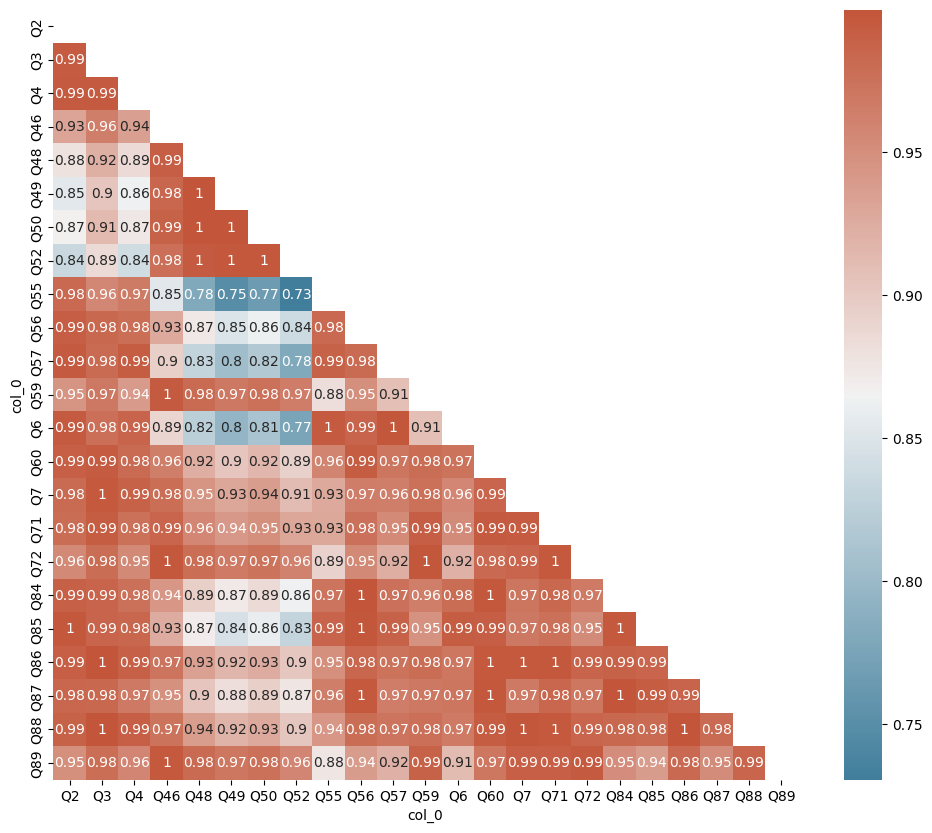

In [248]:
# Correlation between different variables
#
heatmap = score_counts.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(heatmap, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(heatmap, annot=True, mask = mask, cmap=cmap)

In [250]:
# Assuming you have already generated the correlation matrix heatmap and stored it in the variable `heatmap`

# Filter the correlation matrix to identify variables with correlations above 0.8
high_correlation_08 = (heatmap > 0.8)
np.fill_diagonal(high_correlation_08.values, False)  # Exclude self-correlation

# Find indices where the condition is True
indices_08 = np.where(high_correlation_08)

# Extract variable pairs with correlations above 0.8
correlated_variables_08 = [(heatmap.index[i], heatmap.columns[j]) for i, j in zip(*indices_08)]

# Display variables correlated more than 0.8
print("Variables correlated more than 0.8:")
for var1, var2 in correlated_variables_08:
    print(f"{var1} - {var2}: {heatmap.loc[var1, var2]}")


Variables correlated more than 0.8:
Q2 - Q3: 0.9935263061163279
Q2 - Q4: 0.994904816813657
Q2 - Q46: 0.9316891832697505
Q2 - Q48: 0.8780936091000296
Q2 - Q49: 0.8537780937041151
Q2 - Q50: 0.8665538537327773
Q2 - Q52: 0.8353453389553877
Q2 - Q55: 0.9822863482786819
Q2 - Q56: 0.9917331452925969
Q2 - Q57: 0.9946212219691655
Q2 - Q59: 0.9457420516081549
Q2 - Q6: 0.9946760291668805
Q2 - Q60: 0.9903700006333006
Q2 - Q7: 0.9808590685733749
Q2 - Q71: 0.9787167552604707
Q2 - Q72: 0.9554910457460373
Q2 - Q84: 0.9899963504976124
Q2 - Q85: 0.9968501796187695
Q2 - Q86: 0.9904858686623458
Q2 - Q87: 0.9846922238649943
Q2 - Q88: 0.9881060537970465
Q2 - Q89: 0.9493082939286035
Q3 - Q2: 0.9935263061163279
Q3 - Q4: 0.9948584009976068
Q3 - Q46: 0.9643605673789146
Q3 - Q48: 0.9227550553134586
Q3 - Q49: 0.9034229986370933
Q3 - Q50: 0.9133135974559156
Q3 - Q52: 0.8858011277112736
Q3 - Q55: 0.955542948256221
Q3 - Q56: 0.9837837842152978
Q3 - Q57: 0.9811495705249514
Q3 - Q59: 0.9700390976896363
Q3 - Q6: 0.9771

In [251]:
# Assuming you have already generated the correlation matrix heatmap and stored it in the variable `heatmap`

# Filter the correlation matrix to identify variables with correlations above 0.8
high_correlation_08 = (heatmap > 0.8)
np.fill_diagonal(high_correlation_08.values, False)  # Exclude self-correlation

# Count the number of variables that are highly correlated (above 0.8)
count_highly_correlated_08 = np.sum(high_correlation_08)

print(f"There are {count_highly_correlated_08} pairs of variables highly correlated (above 0.8).")


There are col_0
Q2     22
Q3     22
Q4     22
Q46    22
Q48    21
Q49    20
Q50    21
Q52    19
Q55    18
Q56    22
Q57    21
Q59    22
Q6     20
Q60    22
Q7     22
Q71    22
Q72    22
Q84    22
Q85    22
Q86    22
Q87    22
Q88    22
Q89    22
dtype: int64 pairs of variables highly correlated (above 0.8).


In [252]:
# Assuming you have already generated the correlation matrix heatmap and stored it in the variable `heatmap`

def drop_highly_correlated_variables(corr_matrix, threshold=0.8):
    # Create a copy of the correlation matrix to work with
    corr = corr_matrix.copy()
    
    # Set up mask to identify upper triangle and exclude self-correlation
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    
    # Find indices where correlation is higher than the threshold
    highly_correlated = np.where((corr > threshold) & mask)
    
    # Drop one variable from each highly correlated pair
    dropped_variables = set()
    for i, j in zip(*highly_correlated):
        variable1 = corr.columns[i]
        variable2 = corr.index[j]
        
        # Drop the variable that hasn't been dropped yet
        if variable1 not in dropped_variables:
            corr = corr.drop(variable1, axis=1)
            dropped_variables.add(variable1)
        elif variable2 not in dropped_variables:
            corr = corr.drop(variable2, axis=1)
            dropped_variables.add(variable2)
    
    # Return the updated correlation matrix after dropping variables
    return corr

# Drop highly correlated variables (above 0.8 correlation)
threshold_value = 0.8  # Change this threshold as needed
new_corr_matrix = drop_highly_correlated_variables(heatmap, threshold=threshold_value)

# Display the new correlation matrix after dropping variables
print("New Correlation Matrix after dropping highly correlated variables:")
print(new_corr_matrix)


IndexError: index 1 is out of bounds for axis 0 with size 1